# Problema de viaje por carretera
## Búsqueda de costo uniforme (UCS)

Dado el mapa de la siguiente figura, se quiere encontrar el camino más corto desde Málaga a Santiago.

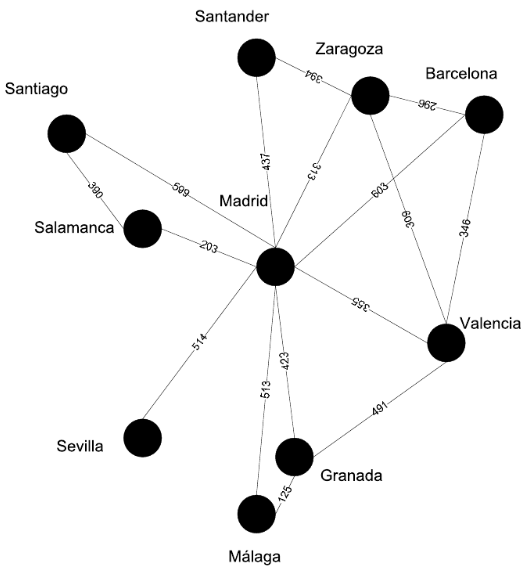

El resultado de la ejecución es:

['Málaga', 'Madrid', 'Salamanca', 'Santiago']

Costo: 1.106


Este es el camino que necesita menor número de kilómetros. Hay caminos que aun pasando por menos ciudades cubren mayor distancia, como el siguiente:

['Málaga', 'Madrid', 'Santiago']

Costo: 1.112

In [ ]:
from arbol import Nodo

def compara(x, y):
    return x.get_costo() - y.get_costo()

In [ ]:
def buscar_solucion_UCS(conexiones, estado_inicial, solucion):
    solucionado=False
    nodos_visitados=[]
    nodos_frontera=[]
    nodo_inicial = Nodo(estado_inicial)
    nodo_inicial.set_costo(0)
    nodos_frontera.append(nodo_inicial)
    while (not solucionado) and len(nodos_frontera)!=0:
        # ordenar la lista de nodos frontera
        nodos_frontera = sorted(nodos_frontera, cmp=compara)
        nodo=nodos_frontera[0]
        # extraer nodo y añadirlo a visitados
        nodos_visitados.append(nodos_frontera.pop(0))
        if nodo.get_datos() == solucion:
            # solución encontrada
            solucionado=True
            return nodo
        else:
            # expandir nodos hijo (ciudades con conexión)
            dato_nodo = nodo.get_datos()
            lista_hijos=[]
            for un_hijo in conexiones[dato_nodo]:
                hijo=Nodo(un_hijo)
                costo = conexiones[dato_nodo][un_hijo]
                hijo.set_costo(nodo.get_costo() + costo)
                lista_hijos.append(hijo)
                if not hijo.en_lista(nodos_visitados):
                    # si está en la lista lo sustituimos con
                    # el nuevo valor de costo si es menor
                    if hijo.en_lista(nodos_frontera):
                        for n in nodos_frontera:
                            if n.igual(hijo) and n.get_costo()>hijo.get_costo():
                                nodos_frontera.remove(n)
                                nodos_frontera.append(hijo)
            else :
                nodos_frontera.append(hijo)
                
            nodo.set_hijos(lista_hijos)

In [ ]:
conexiones = {'Malaga':{'Granada':125, 'Madrid':513}, 
              'Sevilla':{'Madrid':514}, 
              'Granada':{'Malaga':125, 'Madrid':423, 'Valencia':491},
              'Valencia':{'Granada':491, 'Madrid':356, 'Zaragoza':309, 'Barcelona':346}, 
              'Madrid':{'Salamanca':203, 'Sevilla':514, 'Malaga':513,
                        'Granada':423, 'Barcelona':603, 'Santander':437, 'Valencia':356, 
                        'Zaragoza':313, 'Santander':437, 'Santiago':599}, 
              'Salamanca':{'Santiago':390, 'Madrid':203}, 
              'Santiago':{'Salamanca':390, 'Madrid':599},
              'Santander':{'Madrid':437, 'Zaragoza':394}, 
              'Zaragoza':{'Barcelona':296, 'Valencia':309, 'Madrid':313},
              'Barcelona':{'Zaragoza':296, 'Madrid':603, 'Valencia':346}
             }
estado_inicial='Malaga'
solucion='Santiago'
nodo_solucion = buscar_solucion_UCS(conexiones, estado_inicial, solucion)